# Assessing Model Fit

In [ ]:
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
import seaborn as sns
from generator import gather_images

## Original Model : Unbalanced Training Data

The data used to train this model were not balanced to include equal numbers of images with people and without people.

In [12]:
# Read model
model = tf.keras.models.load_model('model.h5')

# Find location of image files and labeled images
# I set aside a group of images (0.2 of the total images available) for testing
data = glob('../data/raw/resized/with_people/splits/model1_testing/*.png')
labels = glob('../data/processed/dots/with_people/splits/model1_testing/*.png')

In [2]:
# Get Predictions
predictions = model.predict_generator(gather_images(data, labels, batch_size=len(data)), steps=1)
predictions = np.array(predictions).reshape(len(predictions),1)
    # resize predictions array so it matches test labels

# Get True Values
test_labels = next(gather_images(data, labels, batch_size=len(data)))[1]

In [3]:
# Merge into one data frame
df = pd.DataFrame(predictions)
df.columns = ['predicted']
df['observed'] = test_labels

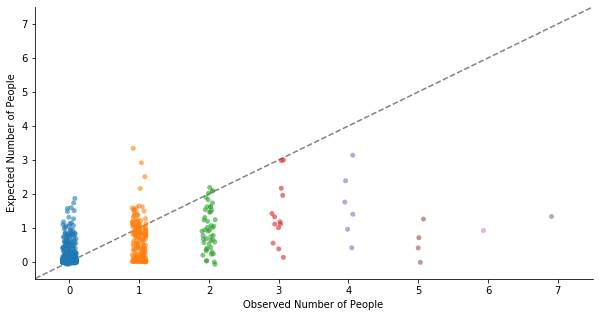

In [4]:
# Plot the difference in observed and expected values
plt.figure(figsize=(10,5))
sns.stripplot(x='observed', y='predicted', data=df, jitter=True, alpha=0.6)
sns.despine()
plt.ylim(-0.5,7.5)
plt.xlim(-0.5,7.5)
plt.plot([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8], marker='', color='gray', linestyle='dashed')
    # 1x1 line to show a perfect fitting model
plt.xlabel('Observed Number of People')
plt.ylabel('Expected Number of People')
plt.show()

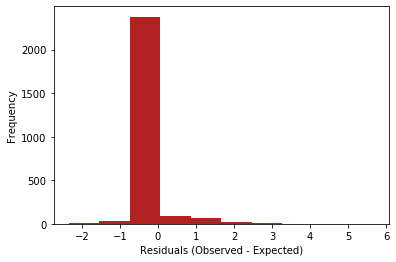

In [5]:
# Plot the residuals to see if they are normally distributed
residuals = df.observed-df.predicted
residuals.plot(kind='hist', color='firebrick')
plt.xlabel('Residuals (Observed - Expected)')
plt.show()

In [21]:
# Print the summary for the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 108, 192, 1)       4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 192, 8)       208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 64, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 21, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 21, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 10, 32)         0         
__________

## New Model: Balanced Training Data

The training data for this model was balanced prior to model training so that there would be an equal number of images with people and without people. 

In [6]:
# Read model
model = tf.keras.models.load_model('balanced_model.h5')

# Find location of image files and labeled images
# I set aside a group of images (0.2 of the total images available) for testing
data = glob('../data/raw/resized/with_people/splits/testing/*.png')
labels = glob('../data/processed/dots/with_people/splits/testing/*.png')

In [7]:
# Get Predictions
predictions = model.predict_generator(gather_images(data, labels, batch_size=len(data)), steps=1)
predictions = np.array(predictions).reshape(len(predictions),1)
    # resahpe predictions so it matches the test labels

# Get True Values
test_labels = next(gather_images(data, labels, batch_size=len(data)))[1]

In [8]:
# Create a new dataframe
df = pd.DataFrame(predictions)
df.columns = ['predicted']
df['observed'] = test_labels

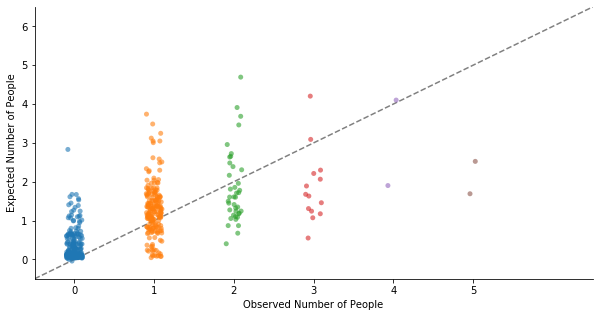

In [9]:
# Plot observed vs expected
plt.figure(figsize=(10,5))
sns.stripplot(x='observed', y='predicted', data=df, jitter=True, alpha=0.6)
sns.despine()
plt.ylim(-0.5,6.5)
plt.xlim(-0.5,6.5)
plt.plot([-1,0,1,2,3,4,5,6,7,8], [-1,0,1,2,3,4,5,6,7,8], marker='', color='gray', linestyle='dashed')
    # 1x1 line to show a perfect fitting model
plt.xlabel('Observed Number of People')
plt.ylabel('Expected Number of People')
plt.show()

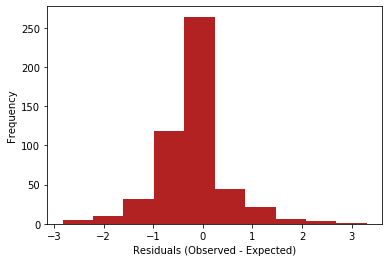

In [10]:
# Calculate and plot the residuals to see if its normally distributed
residuals = df.observed-df.predicted
residuals.plot(kind='hist', color='firebrick')
plt.xlabel('Residuals (Observed - Expected)')
plt.show()

In [11]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 108, 192, 1)       4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 192, 8)       208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 64, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 64, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 21, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 21, 32)        2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 10, 32)         0         
__________